In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

**Load Data**

In [4]:
dataset=pd.read_csv('train.csv')

**data**

battery_power:Total energy a battery can store in one time measured in mAh

blue:Has bluetooth or not

clock_speed:speed at which microprocessor executes instructions

dual_sim:Has dual sim support or not

fc:Front Camera mega pixels

four_g:Has 4G or not

int_memory:Internal Memory in Gigabytes

m_dep:Mobile Depth in cm

mobile_wt:Weight of mobile phone

n_cores:Number of cores of processor

pc:Primary Camera mega pixels

px_height:Pixel Resolution Height

px_width:Pixel Resolution Width

ram:Random Access Memory in Megabytes

sc_h:Screen Height of mobile in cm

sc_w:Screen Width of mobile in cm

talk_time:longest time that a single battery charge will last when you are

three_g:Has 3G or not


touch_screen:Has touch screen or not

wifi:Has wifi or not

In [5]:
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
dataset.shape

(2000, 21)

In [7]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

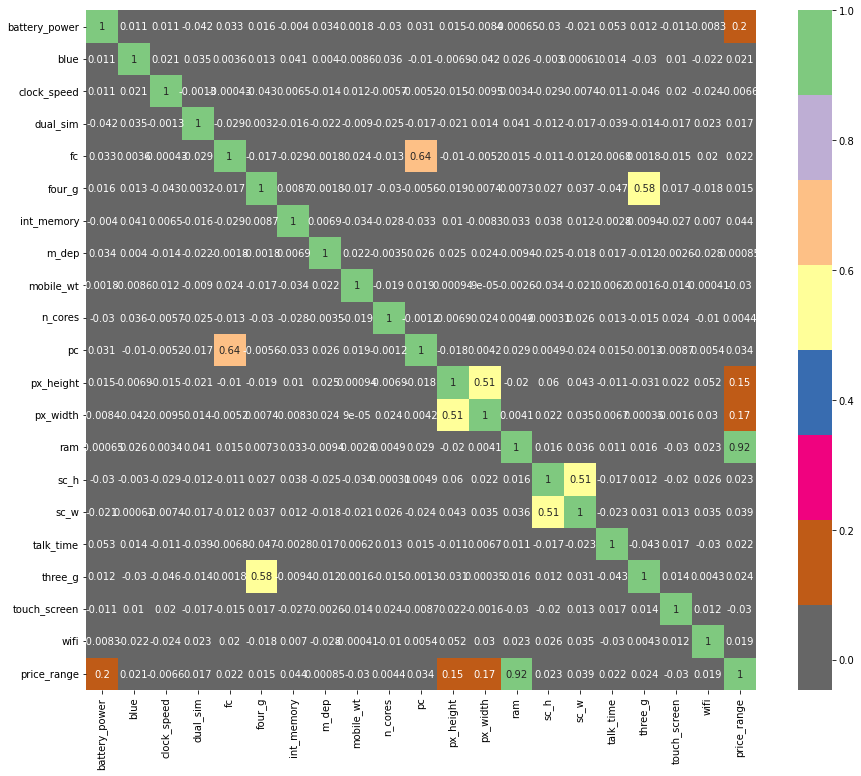

In [10]:
plt.figure(figsize=(15,12.5))
sns.heatmap(dataset.corr(),annot=True,cmap=plt.cm.Accent_r)#pearson correlation , spearman correlation
plt.show();

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

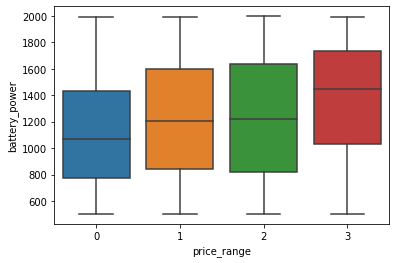

In [11]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

<AxesSubplot:xlabel='price_range', ylabel='ram'>

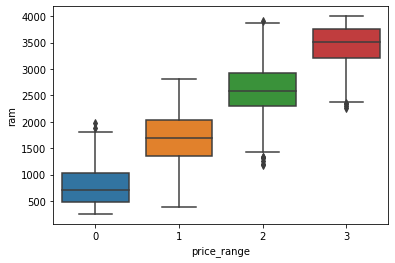

In [12]:
sns.boxplot(x="price_range", y="ram", data=dataset)

<AxesSubplot:xlabel='price_range', ylabel='px_height'>

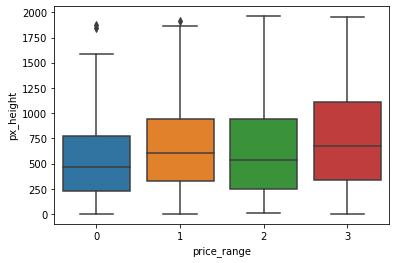

In [13]:
sns.boxplot(x="price_range", y="px_height", data=dataset)

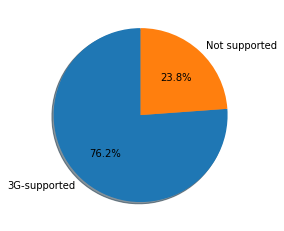

In [14]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

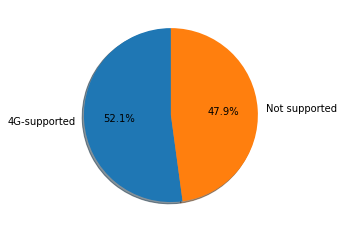

In [15]:
labels = ["4G-supported",'Not supported']
values=dataset['four_g'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [16]:
X=dataset.drop('price_range',axis=1)
y=dataset['price_range']

In [17]:
X.shape

(2000, 20)

In [18]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [21]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
61,799,1,2.3,0,1,1,63,0.8,144,8,6,361,975,431,15,6,6,1,1,1
853,1195,1,1.1,1,2,1,8,0.9,80,6,6,327,1001,643,14,2,19,1,0,0
680,658,1,2.7,0,0,1,12,0.9,103,7,3,1156,1750,3587,14,11,20,1,0,0
455,1747,1,0.9,0,6,1,48,0.7,94,3,19,947,1131,2362,17,2,19,1,1,0
130,1414,0,2.0,1,2,0,54,0.8,99,7,3,262,829,3799,17,7,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,1166,1,0.5,0,7,0,59,0.5,80,1,11,437,638,3887,8,6,7,1,0,1
1862,1043,0,2.7,0,3,0,29,0.2,83,8,17,887,893,1183,5,3,8,1,0,0
1361,1549,1,1.5,1,0,1,27,0.4,113,5,7,632,1162,436,10,8,11,1,0,0
1547,1611,0,0.5,1,4,1,27,0.9,199,1,10,163,1011,3078,15,2,6,1,0,1


In [22]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()



In [23]:
model_LR.fit(X_train,y_train)

LinearRegression()

In [24]:
model_LR.score(X_train,y_train)

0.9202456563636244

In [25]:
y_pred=model_LR.predict(X_test)

In [26]:
scorelr=model_LR.score(X_test,y_test)
scorelr

0.9132801488185277

In [28]:
pickle.dump(model_LR,open("Price_Regression_Model.pkl",'wb'))

In [27]:
from sklearn.svm import SVR
model_SVR=SVR()

In [28]:
model_SVR.fit(X_train,y_train)



SVR()

In [29]:

model_SVR.score(X_train,y_train)

0.9483779856166064

In [30]:
y_pred_SVR=model_SVR.predict(X_test)
scoresvr=model_SVR.score(X_test,y_test)
scoresvr

0.9397114947801383

In [31]:
from sklearn.tree import DecisionTreeRegressor
model_DTR=DecisionTreeRegressor()

In [32]:
model_DTR.fit(X_train,y_train)


DecisionTreeRegressor()

In [33]:
model_DTR.score(X_train,y_train)

1.0

In [34]:
y_pred_DTR=model_DTR.predict(X_test)
scoreDTR=model_DTR.score(X_test,y_test)
scoreDTR

0.8569136158540953

In [35]:
from sklearn.ensemble import RandomForestRegressor
modeRFR=RandomForestRegressor()

In [36]:
modeRFR.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
modeRFR.score(X_train,y_train)

0.9917347452481102

In [38]:
y_pred_RFR=modeRFR.predict(X_test)
scoreRFR=modeRFR.score(X_test,y_test)
scoreRFR

0.9339119763226102

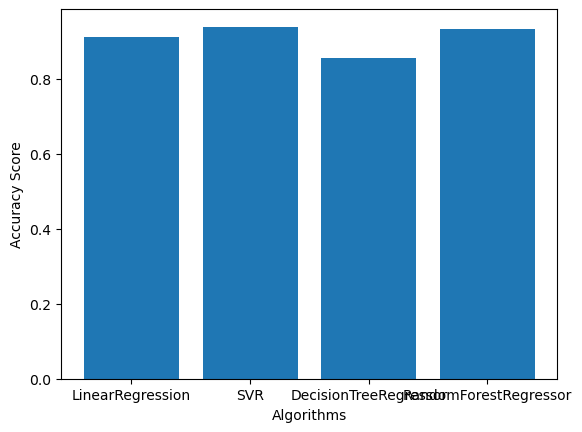

In [39]:
plt.bar(x=['LinearRegression','SVR','DecisionTreeRegressor','RandomForestRegressor'],height=[scorelr,scoresvr,scoreDTR,scoreRFR])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()